In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import csv
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("kidney_disease.csv")
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
# converting necessary columns to numerical type

df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# Extracting categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [4]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)
    
for col in num_cols:
    random_value_imputation(col)

random_value_imputation('rbc')
random_value_imputation('pc')

for col in cat_cols:
    impute_mode(col)
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [5]:
for i in df.columns:
    print("***************", i, "*******************")
    print()
    print(set(df[i].tolist()))
    print()

*************** id *******************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,

In [6]:
print(df['rc'].mode())
print(df['wc'].mode())
print(df['pcv'].mode())

0    5.2
Name: rc, dtype: float64
0    9200.0
Name: wc, dtype: float64
0    41.0
Name: pcv, dtype: float64


In [7]:
df['classification'] = df['classification'].apply(lambda x:'ckd' if x == 'ckd\t' else x)

df['cad'] = df['cad'].apply(lambda x:'no' if x == '\tno' else x)

df['dm'] = df['dm'].apply(lambda x:'no' if x == '\tno' else x)
df['dm'] = df['dm'].apply(lambda x:'yes' if x == '\tyes' else x)
df['dm'] = df['dm'].apply(lambda x:'yes' if x == 'yes' else x)

df['rc'] = df['rc'].apply(lambda x:'5.2' if x == '\t?' else x)

df['wc'] = df['wc'].apply(lambda x:'9800' if x == '\t6200' else x)
df['wc'] = df['wc'].apply(lambda x:'9800' if x == '\t8400' else x)
df['wc'] = df['wc'].apply(lambda x:'9800' if x == '\t?' else x)

df['pcv'] = df['pcv'].apply(lambda x:'41' if x == '\t43' else x)
df['pcv'] = df['pcv'].apply(lambda x:'41' if x == '\t?' else x)

df['classification'] = df['classification'].map({'ckd': 0, 'notckd': 1})
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')

In [8]:
for i in df.columns:
    print("***************", i, "*******************")
    print()
    print(set(df[i].tolist()))
    print()

*************** id *******************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,

In [9]:
df['classification'].value_counts()

classification
0    250
1    150
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


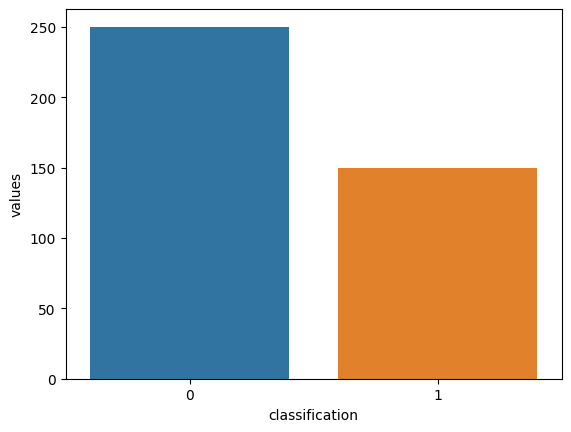

In [10]:
temp = df['classification'].value_counts()
temp_df = pd.DataFrame({'classification': temp.index, 'values':temp.values})
print(sns.barplot(x = 'classification', y = 'values', data =temp_df ))
# Implanced data

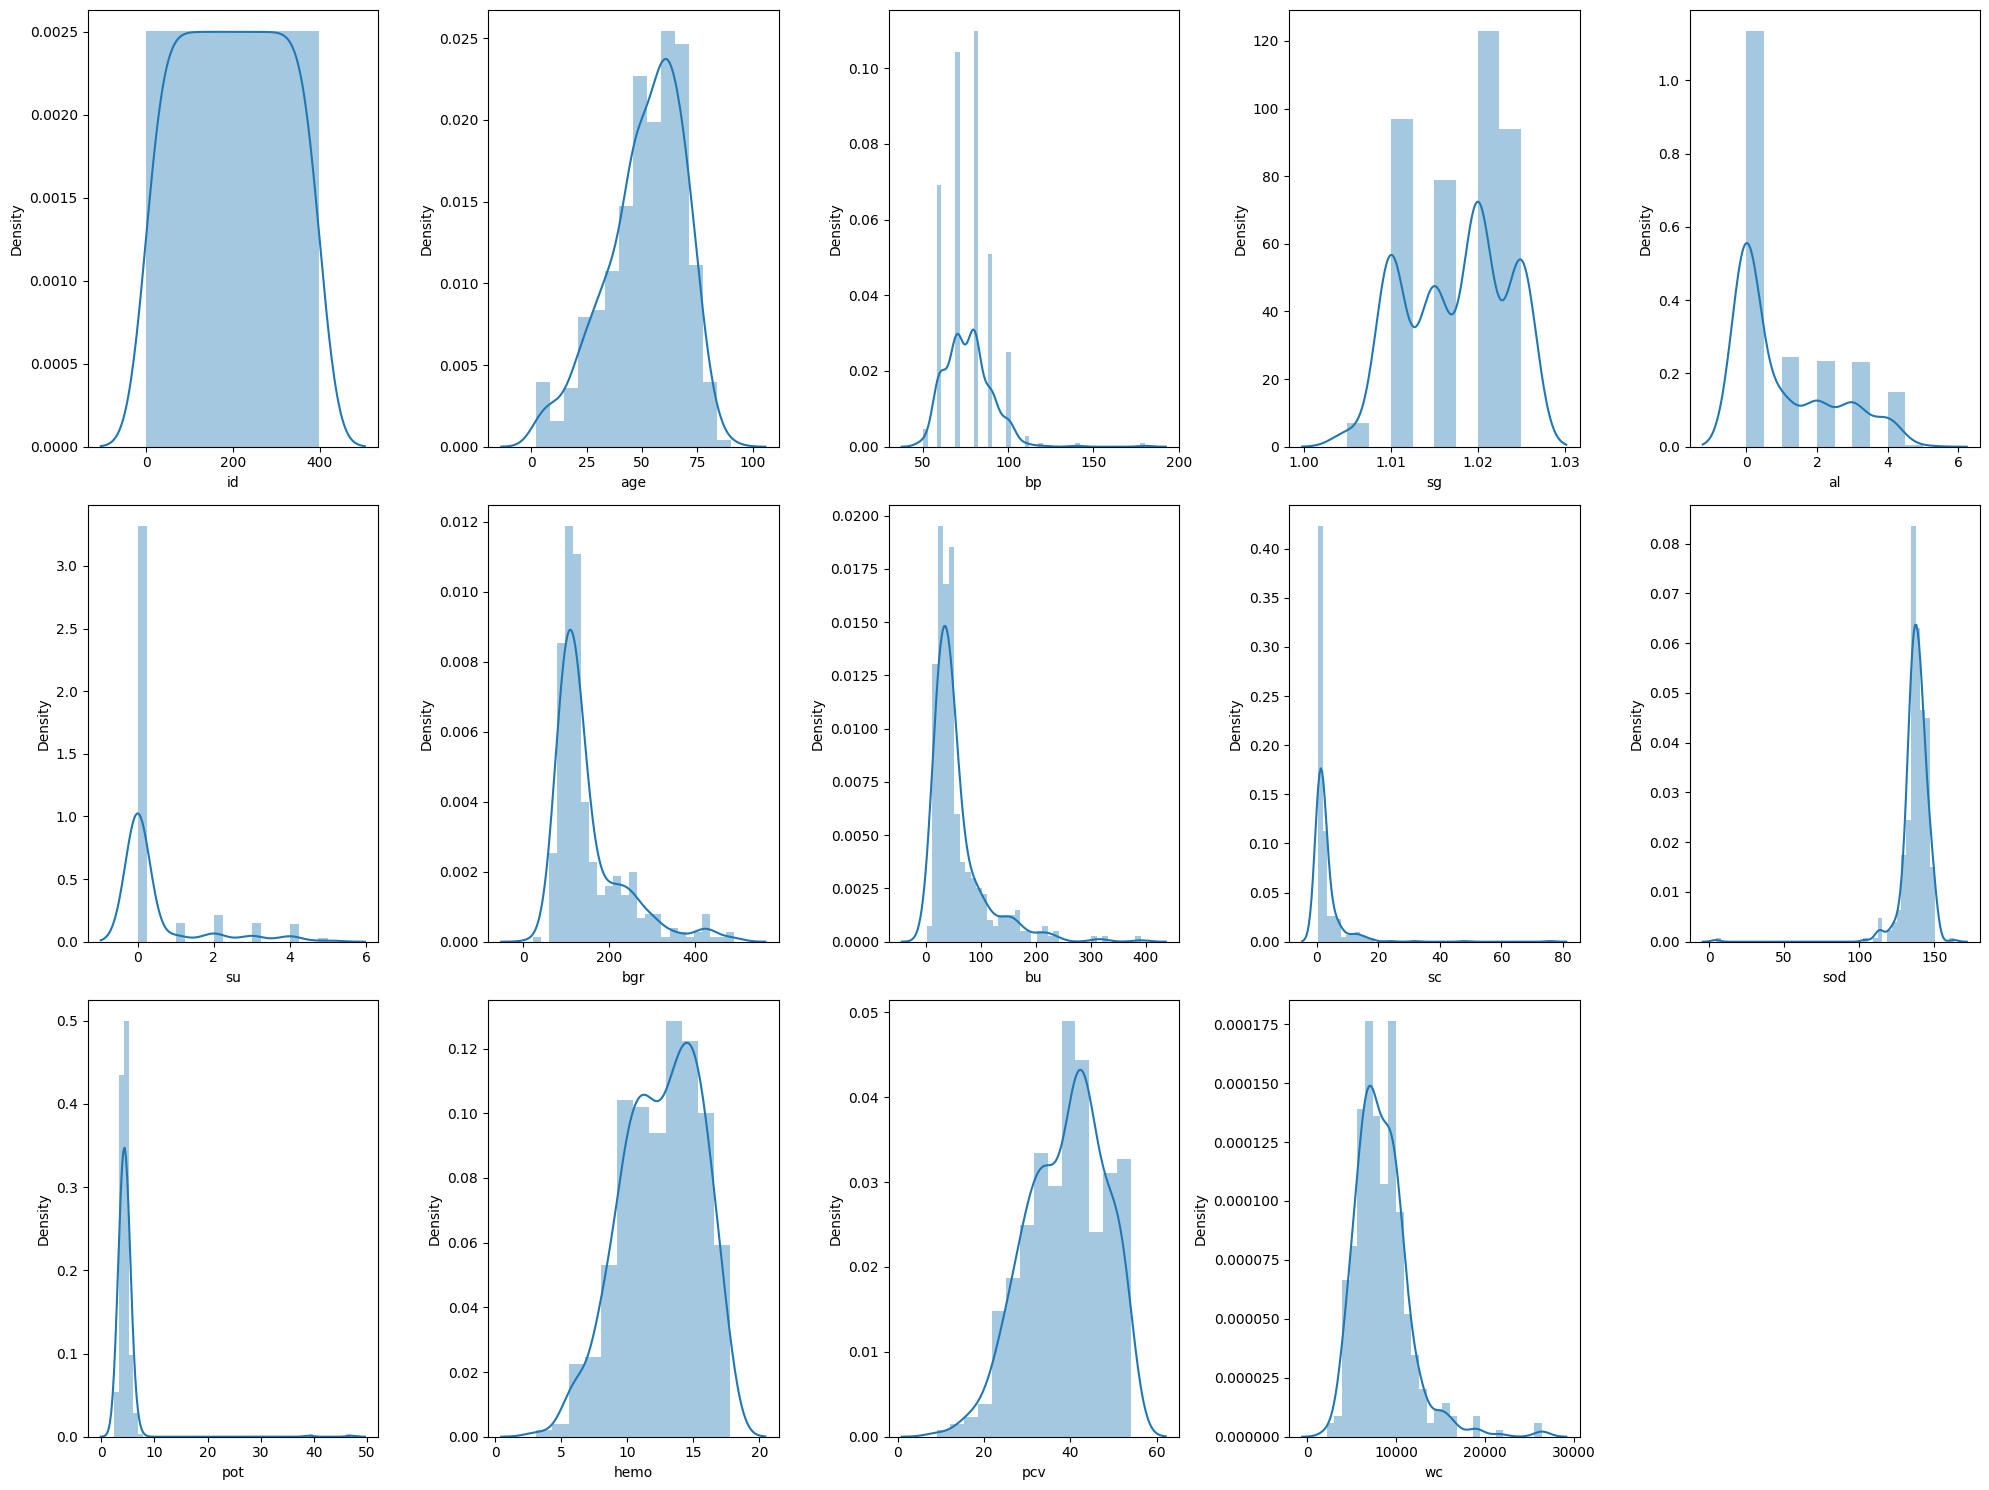

In [11]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

### Skewness is present in some of the columns.

In [12]:
x = df.drop(['id', 'classification'], axis = 1)
y = df['classification']

In [13]:
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,82.0,...,11.3,38.0,6000.0,3.8,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,5.1,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,14.2,51.0,7200.0,5.9,no,no,no,good,no,no


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [15]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import accuracy_score
print(Counter(y))

Counter({0: 250, 1: 150})


In [16]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
le.fit(y_ros)
print(le.classes_)
y_ros = le.transform(y_ros)

[0 1]


In [19]:
X_ros.T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
age,48.0,7.0,62.0,48.0,51.0,60.0,68.0,24.0,52.0,53.0,...,63.0,33.0,55.0,39.0,42.0,69.0,28.0,63.0,23.0,53.0
bp,80.0,50.0,80.0,70.0,80.0,90.0,70.0,90.0,100.0,90.0,...,70.0,80.0,80.0,70.0,70.0,70.0,60.0,70.0,60.0,60.0
sg,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,...,1.02,1.025,1.02,1.025,1.025,1.02,1.025,1.02,1.02,1.025
al,1.0,4.0,2.0,4.0,2.0,3.0,0.0,2.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
su,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rbc,normal,normal,normal,normal,normal,normal,abnormal,normal,normal,abnormal,...,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal
pc,normal,normal,normal,abnormal,normal,normal,normal,abnormal,abnormal,abnormal,...,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present,...,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,...,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
bgr,121.0,82.0,423.0,117.0,106.0,74.0,100.0,410.0,138.0,70.0,...,113.0,128.0,140.0,131.0,75.0,83.0,79.0,113.0,95.0,116.0


In [20]:
def encodeData(df):
    le = LabelEncoder()
    for x in cat_cols:
        if x != 'classification':
            df[f'{x}'] = le.fit_transform(df[x].values)
    return df
X_ros = encodeData(X_ros)
X_ros.T  

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
age,48.00,7.00,62.00,48.000,51.00,60.000,68.00,24.000,52.000,53.00,...,63.00,33.000,55.00,39.000,42.000,69.00,28.000,63.00,23.00,53.000
bp,80.00,50.00,80.00,70.000,80.00,90.000,70.00,90.000,100.000,90.00,...,70.00,80.000,80.00,70.000,70.000,70.00,60.000,70.00,60.00,60.000
sg,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,...,1.02,1.025,1.02,1.025,1.025,1.02,1.025,1.02,1.02,1.025
al,1.00,4.00,2.00,4.000,2.00,3.000,0.00,2.000,3.000,2.00,...,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.00,0.00,0.000
su,0.00,0.00,3.00,0.000,0.00,0.000,0.00,4.000,0.000,0.00,...,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.00,0.00,0.000
rbc,1.00,1.00,1.00,1.000,1.00,1.000,0.00,1.000,1.000,0.00,...,1.00,1.000,1.00,1.000,1.000,1.00,1.000,1.00,1.00,1.000
pc,1.00,1.00,1.00,0.000,1.00,1.000,1.00,0.000,0.000,0.00,...,1.00,1.000,1.00,1.000,1.000,1.00,1.000,1.00,1.00,1.000
pcc,0.00,0.00,0.00,1.000,0.00,0.000,0.00,0.000,1.000,1.00,...,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.00,0.00,0.000
ba,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000,0.00,...,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.00,0.00,0.000
bgr,121.00,82.00,423.00,117.000,106.00,74.000,100.00,410.000,138.000,70.00,...,113.00,128.000,140.00,131.000,75.000,83.00,79.000,113.00,95.00,116.000


In [21]:
X_ros.to_csv("Final_pre_processing_data.csv")

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 1))
x = scaler.fit_transform(X_ros)
y = y_ros

In [23]:
import pickle
from sklearn.preprocessing import MinMaxScaler

# After fitting the scaler during training
scaler = MinMaxScaler((0, 1))
X_scaled = scaler.fit_transform(X_ros)

# Save the scaler to a file
scaler_filename = 'scalercdk.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")


Training Accuracy of KNN is 0.9725
Test Accuracy of KNN is 0.93 

Confusion Matrix :- 
[[42  4]
 [ 3 51]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        46
           1       0.93      0.94      0.94        54

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [26]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")


Training Accuracy of Random Forest Classifier is 0.9975
Test Accuracy of Random Forest Classifier is 0.98 

Confusion Matrix :- 
[[46  0]
 [ 2 52]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        46
           1       1.00      0.96      0.98        54

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.99 

Confusion Matrix :- 
[[46  0]
 [ 1 53]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        54

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")


Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.99 

Confusion Matrix :- 
[[46  0]
 [ 1 53]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        54

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score


logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculate accuracy and ROC-AUC score
accuracy = accuracy_score(y_test, logistic_model.predict(X_test))
roc_auc = roc_auc_score(y_test, y_probs)

print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression ROC-AUC Score:", roc_auc)


Logistic Regression Accuracy: 0.95
Logistic Regression ROC-AUC Score: 0.9931561996779388


In [30]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Random Forest Classifier',
             'Gradient Boosting Classifier', 'XgBoost'],
    'Score' : [knn_acc,rd_clf_acc, gb_acc,  xgb_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Gradient Boosting Classifier,0.99
3,XgBoost,0.99
1,Random Forest Classifier,0.98
0,KNN,0.93


In [31]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(rd_clf, open(filename, 'wb'))

In [32]:
model = pickle.load(open(filename, 'rb'))

In [33]:
def take_inputs():
    age = float(input("Enter age: "))
    blood_pressure = float(input("Enter blood pressure: "))
    specific_gravity = float(input("Enter specific gravity: "))
    albumin = float(input("Enter albumin: "))
    sugar = float(input("Enter sugar: "))
    red_blood_cells = input("Enter red blood cell status (1 for normal/0 for abnormal): ")
    pus_cell = input("Enter pus cell status (1 for normal/0 for abnormal): ")
    pus_cell_clumps = input("Enter pus cell clumps status (1 for notpresent/0 for present): ")
    bacteria = input("Enter bacteria status (0 for notpresent/1 for present): ")
    blood_glucose_random = float(input("Enter blood glucose random: "))
    blood_urea = float(input("Enter blood urea: "))
    serum_creatinine = float(input("Enter serum creatinine: "))
    sodium = float(input("Enter sodium: "))
    potassium = float(input("Enter potassium: "))
    haemoglobin = float(input("Enter haemoglobin: "))
    packed_cell_volume = float(input("Enter packed cell volume: "))
    white_blood_cell_count = float(input("Enter white blood cell count: "))
    red_blood_cell_count = float(input("Enter red blood cell count: "))
    hypertension = input("Enter hypertension status (1 for yes/0 for no): ")
    diabetes_mellitus = input("Enter diabetes mellitus status (2 for yes/1 for no): ")
    coronary_artery_disease = input("Enter coronary artery disease status (1 for yes/0 for no): ")
    appetite = input("Enter appetite status (0 for good/1 for poor): ")
    peda_edema = input("Enter pedal edema status (1 for yes/0 for no): ")
    aanemia = input("Enter anemia status (1 for yes/0 for no): ")
    user_input = np.array([[red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,
    coronary_artery_disease,appetite,peda_edema,aanemia,age,
    blood_pressure,specific_gravity,albumin,sugar,
    blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,
    haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count]])
    return user_input


In [34]:
with open('results.csv','w') as f:
    csvw = csv.writer(f)
    csvw.writerow(['probability_of_cdk','prediction'])

In [35]:
# user_input = take_inputs()
# change this to feed inputs
user_input = (31.0,99.0,1.025,1.0,0.0,0,1,1,1,132.0,48.0,0.9,170.0,6.0,27.0,54.0,8200.0,23.8,1,2,0,1,1,1)
user_input_np = np.asarray(user_input)
res_input_unsc = user_input_np.reshape(1,-1)
res_input = scaler.transform(res_input_unsc)


In [36]:
probability_of_ckd = model.predict_proba(res_input)[:, 0]
prediction = model.predict(res_input)
percentage_probability = probability_of_ckd * 100
with open('results.csv','a') as f:
    csvw = csv.writer(f)
    csvw.writerow([probability_of_ckd[0],prediction[0]])
print(prediction)
print(f"The probability of having Chronic Kidney Disease (CKD) is: {percentage_probability[0]:.2f}%")

[0]
The probability of having Chronic Kidney Disease (CKD) is: 82.56%
